<a href="https://colab.research.google.com/github/marymanz/Final_NFL_Project/blob/main/Math_NFL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and clean data

In [2]:
# # Uncomment if running from Google Collaboratory
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import random
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [3]:
# -- set the filename
# Uncomment if running from Google Collaboratory
fname = "NFL_2019_data.csv"
# fname = "/content/drive/MyDrive/math637_MaryManz/NFL_2019_data.csv"


# -- read the csv into a DataFrame
data = pd.read_csv(fname)

In [4]:
# -- set the filename
# Uncomment if running from Google Collaboratory
fname = "2020 scores.csv"
# fname = "/content/drive/MyDrive/math637_MaryManz/2020 scores.csv"

# -- read the csv into a DataFrame
data2 = pd.read_csv(fname)

In [5]:
# -- clean data
data=data.replace('\*','',regex=True)
data=data.replace('\(','',regex=True)
data=data.replace('\)','',regex=True)
data = data.astype(float)

# Attempt 1: 48 features 

In [6]:
# -- isolate the features
feat = data.iloc[:, 1:].abs()

# -- pull out the target variable
#targ = data.iloc[:, 0]
targ = data2.iloc[:, 6]

In [7]:
# -- create a random training and testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

In [8]:
# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state= 17)
rf.fit(feat_tr, targ_tr)
print(rf.predict(feat_tr)[0:6])
pred_tr = rf.predict(feat_tr)
pred_te = rf.predict(feat_te)

r_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
r_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
r_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
r_R2_train48 = r2_score(targ_tr, pred_tr)
r_R2_test48 = r2_score(targ_te, pred_te)

[37.14 37.08 56.88 40.82 39.53 45.04]


In [9]:
# linear regression model
reg = LinearRegression().fit(feat_tr, targ_tr)
print(reg.predict(feat_tr)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

L_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
L_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
L_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
L_R2_train48 = r2_score(targ_tr, pred_tr)
L_R2_test48 = r2_score(targ_te, pred_te)

[40.2679708  47.04860489 57.73079511 58.74505787 31.16031918 56.68651311]


In [10]:
# ridge regression model
clf = Ridge()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

ri_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
ri_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
ri_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
ri_R2_train48 = r2_score(targ_tr, pred_tr)
ri_R2_test48 = r2_score(targ_te, pred_te)

[62.42091146 47.5180886  48.14418764 35.57758542 58.21190609 52.91660639]


In [11]:
# lasso regression model
clf = linear_model.Lasso()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

La_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
La_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
La_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
La_R2_train48 = r2_score(targ_tr, pred_tr)
La_R2_test48 = r2_score(targ_te, pred_te)

[59.55194112 46.71924478 46.87279108 36.30353741 55.0559944  53.70053874]


In [12]:
# support vector regression model
regr = SVR()
regr.fit(feat_tr, targ_tr)
print(regr.predict(feat_te)[0:6])
pred_tr = regr.predict(feat_tr)
pred_te = regr.predict(feat_te)

s_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
s_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
s_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
s_R2_train48 = r2_score(targ_tr, pred_tr)
s_R2_test48 = r2_score(targ_te, pred_te)

[51.09029372 49.72453777 50.59498454 48.5013163  51.54871001 50.01563431]


In [13]:
# decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(feat_tr, targ_tr)
print(dtr.predict(feat_te)[0:6])
pred_tr = dtr.predict(feat_tr)
pred_te = dtr.predict(feat_te)

d_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
d_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
d_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
d_R2_train48 = r2_score(targ_tr, pred_tr)
d_R2_test48 = r2_score(targ_te, pred_te)

[44. 30. 32. 25. 58. 59.]


In [14]:
# gradient boosting regressor model
reg = GradientBoostingRegressor()
reg.fit(feat_tr, targ_tr)
print(reg.predict(feat_te)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

gr_MAE_48 = metrics.mean_absolute_error(targ_te, pred_te)
gr_MSE_48 =  metrics.mean_squared_error(targ_te, pred_te)
gr_RMSE_48 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
gr_R2_train48 = r2_score(targ_tr, pred_tr)
gr_R2_test48 = r2_score(targ_te, pred_te)

[58.50145546 45.38012356 49.29336001 31.77797267 59.96579101 65.7454304 ]


# Attempt 2: 24 features

In [15]:
feat["QB_total"] = feat["QB"] + feat["QB.1"]
feat["RB1_total"] = feat["RB1"] + feat["RB1.1"]
feat["RB2"] = feat["RB2"] + feat["RB2.1"]
feat["TE_total"] = feat["TE"] + feat["TE.1"]
feat["WR1_total"] = feat["WR1"] + feat["WR1.1"]
feat["WR2_total"] = feat["WR2"] + feat["WR2.1"]
feat["WR3_total"] = feat["WR3"] + feat["WR3.1"]
feat["LT_total"] = feat["LT "] + feat["LT .1"]
feat["LG_total"] = feat["LG"] + feat["LG.1"]
feat["C_total"] = feat["C"] + feat["C.1"]
feat["RG_total"] = feat["RG"] + feat["RG.1"]
feat["RT_total"] = feat["RT"] + feat["RT.1"]
feat["DT1_total"] = feat["DT1"] + feat["DT1.1"]
feat["DT2_total"] = feat["DT2"] + feat["DT1.1"]
feat["DT3_total"] = feat["DT3"] + feat["DT3.1"]
feat["Edge1_total"] = feat["Edge1"] + feat["Edge1.1"]
feat["Edge2_total"] = feat["Edge2"] + feat["Edge2.1"]
feat["LB1_total"] = feat["LB1"] + feat["LB1.1"]
feat["LB2_total"] = feat["LB2"] + feat["LB2.1"]
feat["CB1_total"] = feat["CB1"] + feat["CB1.1"]
feat["CB2_total"] = feat["CB2"] + feat["CB2.1"]
feat["CB3_total"] = feat["CB3"] + feat["CB3.1"]
feat["SS_total"] = feat["SS"] + feat["SS.1"]
feat["FS_total"] = feat["FS"] + feat["FS.1"]                                                                                                 

In [16]:
feat_a = feat.iloc[0:feat.shape[0], 49:feat.shape[1]]

In [17]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_a, targ, test_size=0.2, random_state=302) # model with 24 features

In [18]:
# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state= 17)
rf.fit(feat_tr, targ_tr)
print(rf.predict(feat_tr)[0:6])
pred_tr = rf.predict(feat_tr)
pred_te = rf.predict(feat_te)

r_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
r_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
r_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
r_R2_train24 = r2_score(targ_tr, pred_tr)
r_R2_test24 = r2_score(targ_te, pred_te)

[38.43 34.44 53.92 31.9  39.2  44.29]


In [19]:
# linear regression model
reg = LinearRegression().fit(feat_tr, targ_tr)
print(reg.predict(feat_tr)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

L_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
L_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
L_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
L_R2_train24 = r2_score(targ_tr, pred_tr)
L_R2_test24 = r2_score(targ_te, pred_te)

[47.00475219 48.96630214 53.54204865 44.78204651 35.48318933 55.47001027]


In [20]:
# ridge regression model
clf = Ridge()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

ri_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
ri_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
ri_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
ri_R2_train24 = r2_score(targ_tr, pred_tr)
ri_R2_test24 = r2_score(targ_te, pred_te)

[51.44941647 44.5072046  46.50812429 45.48323966 55.02053147 52.00344131]


In [21]:
# lasso regression model
clf = linear_model.Lasso()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

La_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
La_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
La_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
La_R2_train24 = r2_score(targ_tr, pred_tr)
La_R2_test24 = r2_score(targ_te, pred_te)

[50.94229099 46.6652039  44.85939053 43.44700498 53.68468553 51.35086357]


In [22]:
# support vector regression model
regr = SVR()
regr.fit(feat_tr, targ_tr)
print(regr.predict(feat_te)[0:6])
pred_tr = regr.predict(feat_tr)
pred_te = regr.predict(feat_te)

s_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
s_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
s_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
s_R2_train24 = r2_score(targ_tr, pred_tr)
s_R2_test24 = r2_score(targ_te, pred_te)

[51.52752686 48.76851994 49.01811266 49.3485188  51.06807213 50.82430113]


In [23]:
# decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(feat_tr, targ_tr)
print(dtr.predict(feat_te)[0:6])
pred_tr = dtr.predict(feat_tr)
pred_te = dtr.predict(feat_te)

d_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
d_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
d_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
d_R2_train24 = r2_score(targ_tr, pred_tr)
d_R2_test24 = r2_score(targ_te, pred_te)

[54. 63. 40. 35. 57. 47.]


In [24]:
# gradient boosting regressor model
reg = GradientBoostingRegressor()
reg.fit(feat_tr, targ_tr)
print(reg.predict(feat_te)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

gr_MAE_24 = metrics.mean_absolute_error(targ_te, pred_te)
gr_MSE_24 =  metrics.mean_squared_error(targ_te, pred_te)
gr_RMSE_24 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
gr_R2_train24 = r2_score(targ_tr, pred_tr)
gr_R2_test24 = r2_score(targ_te, pred_te)

[53.85243104 45.42240549 46.90107213 44.40730776 51.42154853 63.21542209]


# Attempt 3: 4 features

In [25]:
feat["off_1"] = feat.iloc[0:feat.shape[0], 0:12].sum(axis=1)
feat["def_1"] = feat.iloc[0:feat.shape[0], 12:24].sum(axis=1)
feat["off_2"] = feat.iloc[0:feat.shape[0], 24:36].sum(axis=1)
feat["def_2"] = feat.iloc[0:feat.shape[0], 36:48].sum(axis=1)

In [26]:
feat_b = feat.iloc[0:feat.shape[0], 71:]

In [27]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_b, targ, test_size=0.2, random_state=302) # model with 4 features

In [28]:
# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state= 17)
rf.fit(feat_tr, targ_tr)
print(rf.predict(feat_tr)[0:6])
pred_tr = rf.predict(feat_tr)
pred_te = rf.predict(feat_te)

r_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
r_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
r_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
r_R2_train4 = r2_score(targ_tr, pred_tr)
r_R2_test4 = r2_score(targ_te, pred_te)

[37.44 39.28 54.23 38.17 42.61 43.28]


In [29]:
# linear regression model
reg = LinearRegression().fit(feat_tr, targ_tr)
print(reg.predict(feat_tr)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

L_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
L_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
L_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
L_R2_train4 = r2_score(targ_tr, pred_tr)
L_R2_test4 = r2_score(targ_te, pred_te)

[48.0217854  54.86766456 48.94344729 55.5816591  51.25904748 50.49343992]


In [30]:
# ridge regression model
clf = Ridge()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

ri_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
ri_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
ri_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
ri_R2_train4 = r2_score(targ_tr, pred_tr)
ri_R2_test4 = r2_score(targ_te, pred_te)

[54.20889425 48.74153423 50.67174487 46.98073074 51.29883103 52.99943361]


In [31]:
# lasso regression model
clf = linear_model.Lasso()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

La_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
La_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
La_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
La_R2_train4 = r2_score(targ_tr, pred_tr)
La_R2_test4 = r2_score(targ_te, pred_te)

[54.15542985 48.78563175 50.63630191 47.01617048 51.30201787 52.89012437]


In [32]:
# support vector regression model
regr = SVR()
regr.fit(feat_tr, targ_tr)
print(regr.predict(feat_te)[0:6])
pred_tr = regr.predict(feat_tr)
pred_te = regr.predict(feat_te)

s_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
s_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
s_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
s_R2_train4 = r2_score(targ_tr, pred_tr)
s_R2_test4 = r2_score(targ_te, pred_te)

[51.94588451 49.55125495 50.8104417  48.9398081  53.07743412 50.66377234]


In [33]:
# decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(feat_tr, targ_tr)
print(dtr.predict(feat_te)[0:6])
pred_tr = dtr.predict(feat_tr)
pred_te = dtr.predict(feat_te)

d_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
d_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
d_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
d_R2_train4 = r2_score(targ_tr, pred_tr)
d_R2_test4 = r2_score(targ_te, pred_te)

[44. 39. 51. 46. 37. 41.]


In [34]:
# gradient boosting regressor model
reg = GradientBoostingRegressor()
reg.fit(feat_tr, targ_tr)
print(reg.predict(feat_te)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

gr_MAE_4 = metrics.mean_absolute_error(targ_te, pred_te)
gr_MSE_4 =  metrics.mean_squared_error(targ_te, pred_te)
gr_RMSE_4 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
gr_R2_train4 = r2_score(targ_tr, pred_tr)
gr_R2_test4 = r2_score(targ_te, pred_te)

[57.19383057 47.98879446 51.92046166 34.10189957 55.83422869 51.13097344]


#Attempt 5: 2 features

In [35]:
feat["off_diff"] = feat["off_1"] - feat["off_2"]
feat["def_diff"] = feat["def_1"] - feat["def_2"]
feat_c = feat[["off_diff", "def_diff"]]

In [36]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_c, targ, test_size=0.2, random_state=302) # model with 2 features

In [37]:
# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state= 17)
rf.fit(feat_tr, targ_tr)
print(rf.predict(feat_tr)[0:6])
pred_tr = rf.predict(feat_tr)
pred_te = rf.predict(feat_te)

r_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
r_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
r_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
r_R2_train2 = r2_score(targ_tr, pred_tr)
r_R2_test2 = r2_score(targ_te, pred_te)

[39.3  40.91 52.97 37.4  46.32 47.56]


In [38]:
# linear regression model
reg = LinearRegression().fit(feat_tr, targ_tr)
print(reg.predict(feat_tr)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

L_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
L_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
L_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
L_R2_train2 = r2_score(targ_tr, pred_tr)
L_R2_test2 = r2_score(targ_te, pred_te)

[48.96689331 53.68481833 49.42380937 56.71669823 53.65511161 49.57153353]


In [39]:
# ridge regression model
clf = Ridge()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

ri_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
ri_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
ri_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
ri_R2_train2 = r2_score(targ_tr, pred_tr)
ri_R2_test2 = r2_score(targ_te, pred_te)

[50.68733908 49.25793843 51.58628142 46.0968473  52.3069056  53.50888594]


In [40]:
# lasso regression model
clf = linear_model.Lasso()
clf.fit(feat_tr, targ_tr)
print(clf.predict(feat_te)[0:6])
pred_tr = clf.predict(feat_tr)
pred_te = clf.predict(feat_te)

La_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
La_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
La_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
La_R2_train2 = r2_score(targ_tr, pred_tr)
La_R2_test2 = r2_score(targ_te, pred_te)

[50.68782426 49.26539765 51.57929583 46.12951203 52.28891386 53.47406576]


In [41]:
# support vector regression model
regr = SVR()
regr.fit(feat_tr, targ_tr)
print(regr.predict(feat_te)[0:6])
pred_tr = regr.predict(feat_tr)
pred_te = regr.predict(feat_te)

s_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
s_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
s_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
s_R2_train2 = r2_score(targ_tr, pred_tr)
s_R2_test2 = r2_score(targ_te, pred_te)

[49.25863698 48.18241314 50.64970726 48.00096171 52.10000223 53.83478207]


In [42]:
# decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(feat_tr, targ_tr)
print(dtr.predict(feat_te)[0:6])
pred_tr = dtr.predict(feat_tr)
pred_te = dtr.predict(feat_te)

d_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
d_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
d_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
d_R2_train2 = r2_score(targ_tr, pred_tr)
d_R2_test2 = r2_score(targ_te, pred_te)

[49. 44. 46. 30. 52. 61.]


In [43]:
# gradient boosting regressor model
reg = GradientBoostingRegressor()
reg.fit(feat_tr, targ_tr)
print(reg.predict(feat_te)[0:6])
pred_tr = reg.predict(feat_tr)
pred_te = reg.predict(feat_te)

gr_MAE_2 = metrics.mean_absolute_error(targ_te, pred_te)
gr_MSE_2 =  metrics.mean_squared_error(targ_te, pred_te)
gr_RMSE_2 = np.sqrt(metrics.mean_squared_error(targ_te, pred_te))
gr_R2_train2 = r2_score(targ_tr, pred_tr)
gr_R2_test2 = r2_score(targ_te, pred_te)

[55.05956759 47.24442096 50.92564197 55.66569249 47.44406062 48.68686279]


#Dummy Model

In [44]:
mode = targ.mode()

In [45]:
dum = [mode] * 52
dum_tr = [mode] * 204

In [46]:
MAE_d = metrics.mean_absolute_error(targ_te, dum)
MSE_d =  metrics.mean_squared_error(targ_te, dum)
RMSE_d = np.sqrt(metrics.mean_squared_error(targ_te, dum))
R2_traind = r2_score(targ_tr, dum_tr)
R2_testd = r2_score(targ_te, dum)

#Metrics comparison

In [47]:
MAE_48 = [r_MAE_48, L_MAE_48, ri_MAE_48, La_MAE_48, s_MAE_48, d_MAE_48, gr_MAE_48]
MAE_24 = [r_MAE_24, L_MAE_24, ri_MAE_24, La_MAE_24, s_MAE_24, d_MAE_24, gr_MAE_24]
MAE_4 = [r_MAE_4, L_MAE_4, ri_MAE_4, La_MAE_4, s_MAE_4, d_MAE_4, gr_MAE_4]
MAE_2 = [r_MAE_2, L_MAE_2, ri_MAE_2, La_MAE_2, s_MAE_2, d_MAE_2, gr_MAE_2]
MAE_d = [MAE_d, MAE_d, MAE_d, MAE_d, MAE_d, MAE_d, MAE_d]

In [48]:
MSE_48 = [r_MSE_48, L_MSE_48, ri_MSE_48, La_MSE_48, s_MSE_48, d_MSE_48, gr_MSE_48]
MSE_24 = [r_MSE_24, L_MSE_24, ri_MSE_24, La_MSE_24, s_MSE_24, d_MSE_24, gr_MSE_24]
MSE_4 = [r_MSE_4, L_MSE_4, ri_MSE_4, La_MSE_4, s_MSE_4, d_MSE_4, gr_MSE_4]
MSE_2 = [r_MSE_2, L_MSE_2, ri_MSE_2, La_MSE_2, s_MSE_2, d_MSE_2, gr_MSE_2]
MSE_d = [MSE_d, MSE_d, MSE_d, MSE_d, MSE_d, MSE_d, MSE_d]

In [49]:
RMSE_48 = [r_RMSE_48, L_RMSE_48, ri_RMSE_48, La_RMSE_48, s_RMSE_48, d_RMSE_48, gr_RMSE_48]
RMSE_24 = [r_RMSE_24, L_RMSE_24, ri_RMSE_24, La_RMSE_24, s_RMSE_24, d_RMSE_24, gr_RMSE_24]
RMSE_4 = [r_RMSE_4, L_RMSE_4, ri_RMSE_4, La_RMSE_4, s_RMSE_4, d_RMSE_4, gr_RMSE_4]
RMSE_2 = [r_RMSE_2, L_RMSE_2, ri_RMSE_2, La_RMSE_2, s_RMSE_2, d_RMSE_2, gr_RMSE_2]
RMSE_d = [RMSE_d, RMSE_d, RMSE_d, RMSE_d, RMSE_d, RMSE_d, RMSE_d]

In [50]:
R2tr_48 = [gr_R2_train48, L_R2_train48, ri_R2_train48, La_R2_train48, s_R2_train48, d_R2_train48, gr_R2_train48]
R2tr_24 = [r_R2_train24, L_R2_train24, ri_R2_train24, La_R2_train24, s_R2_train24, d_R2_train24, gr_R2_train24]
R2tr_4 = [r_R2_train4, L_R2_train4, ri_R2_train4, La_R2_train4, s_R2_train4, d_R2_train4, gr_R2_train4]
R2tr_2 = [gr_R2_train2, L_R2_train2, ri_R2_train2, La_R2_train2, s_R2_train2, d_R2_train2, gr_R2_train2]
R2_traind = [R2_traind, R2_traind, R2_traind, R2_traind, R2_traind, R2_traind, R2_traind]

In [51]:
R2te_48 = [gr_R2_test48, L_R2_test48, ri_R2_test48, La_R2_test48, s_R2_test48, d_R2_test48, gr_R2_test48]
R2te_24 = [r_R2_test24, L_R2_test24, ri_R2_test24, La_R2_test24, s_R2_test24, d_R2_test24, gr_R2_test24]
R2te_4 = [r_R2_test4, L_R2_test4, ri_R2_test4, La_R2_test4, s_R2_test4, d_R2_test4, gr_R2_test4]
R2te_2 = [gr_R2_test2, L_R2_test2, ri_R2_test2, La_R2_test2, s_R2_test2, d_R2_test2, gr_R2_test2]
R2_testd = [R2_testd, R2_testd, R2_testd, R2_testd, R2_testd, R2_testd, R2_testd]

In [52]:
errors = ["Random Forest", "Linear", "Ridge", "Lasso", "Support Vector", "Decision Tree", "Gradiant Boosting"]

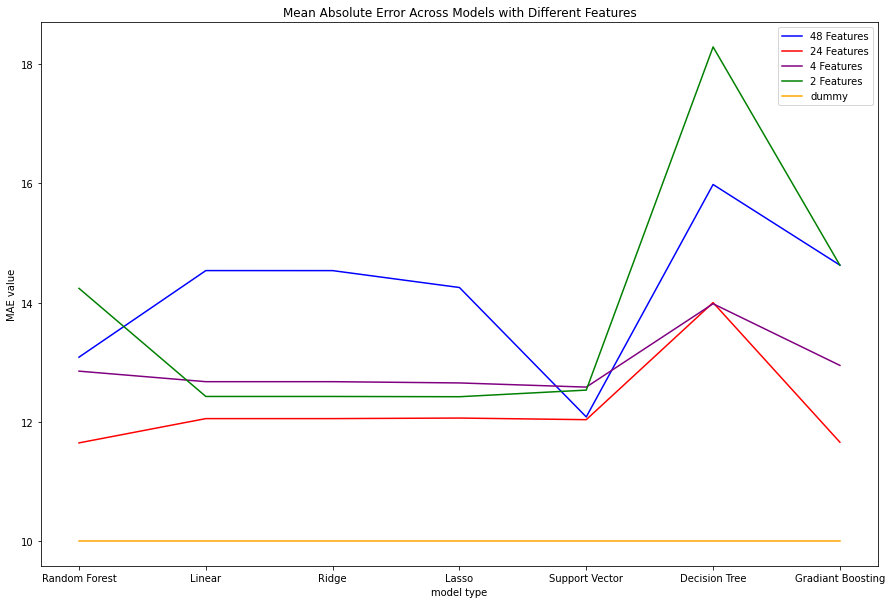

In [53]:
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(errors, MAE_48, '-b', label='48 Features')
ax.plot(errors, MAE_24, '-r', label='24 Features')
ax.plot(errors, MAE_4, 'purple', label='4 Features')
ax.plot(errors, MAE_2, '-g', label='2 Features')
ax.plot(errors, MAE_d, 'orange', label='dummy')
# naming the x axis 
plt.xlabel('model type') 
# naming the y axis 
plt.ylabel('MAE value')
# title
plt.title("Mean Absolute Error Across Models with Different Features") 
# show the legend 
leg = ax.legend();

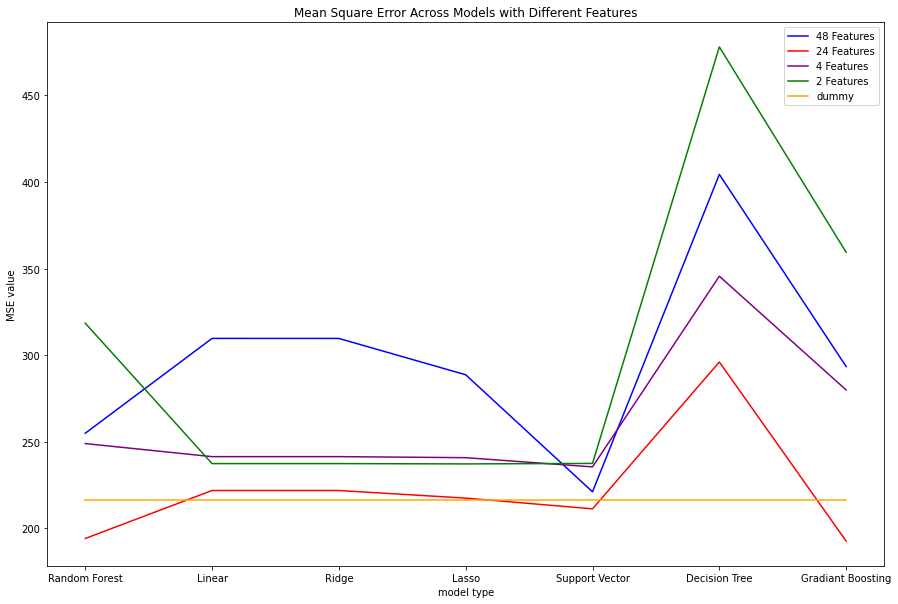

In [54]:
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(errors, MSE_48, '-b', label='48 Features')
ax.plot(errors, MSE_24, '-r', label='24 Features')
ax.plot(errors, MSE_4, 'purple', label='4 Features')
ax.plot(errors, MSE_2, '-g', label='2 Features')
ax.plot(errors, MSE_d, 'orange', label='dummy')
# naming the x axis 
plt.xlabel('model type') 
# naming the y axis 
plt.ylabel('MSE value') 
# title
plt.title("Mean Square Error Across Models with Different Features") 
# show the legend 
leg = ax.legend();

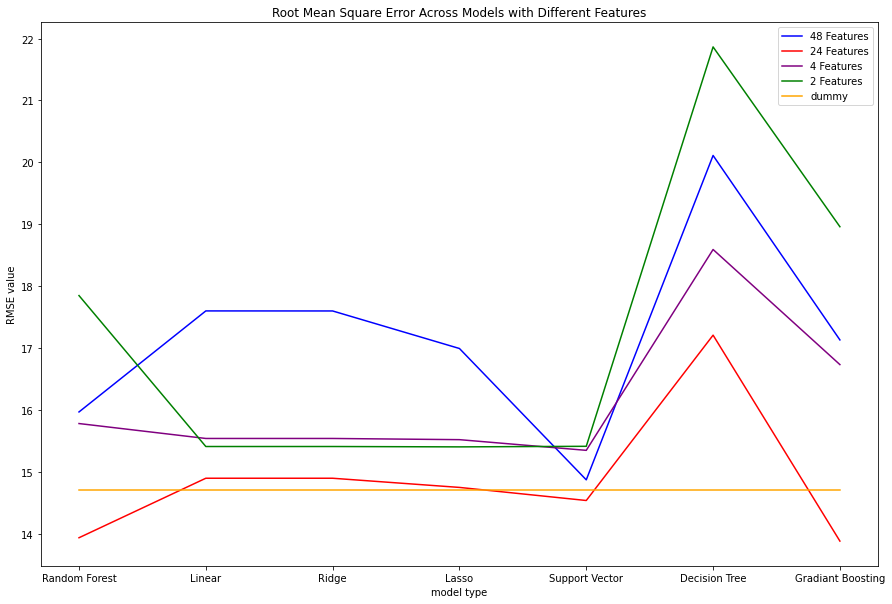

In [55]:
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(errors, RMSE_48, '-b', label='48 Features')
ax.plot(errors, RMSE_24, '-r', label='24 Features')
ax.plot(errors, RMSE_4, 'purple', label='4 Features')
ax.plot(errors, RMSE_2, '-g', label='2 Features')
ax.plot(errors, RMSE_d, 'orange', label='dummy')
# naming the x axis 
plt.xlabel('model type') 
# naming the y axis 
plt.ylabel('RMSE value') 
# title
plt.title("Root Mean Square Error Across Models with Different Features") 
# show the legend 
leg = ax.legend();

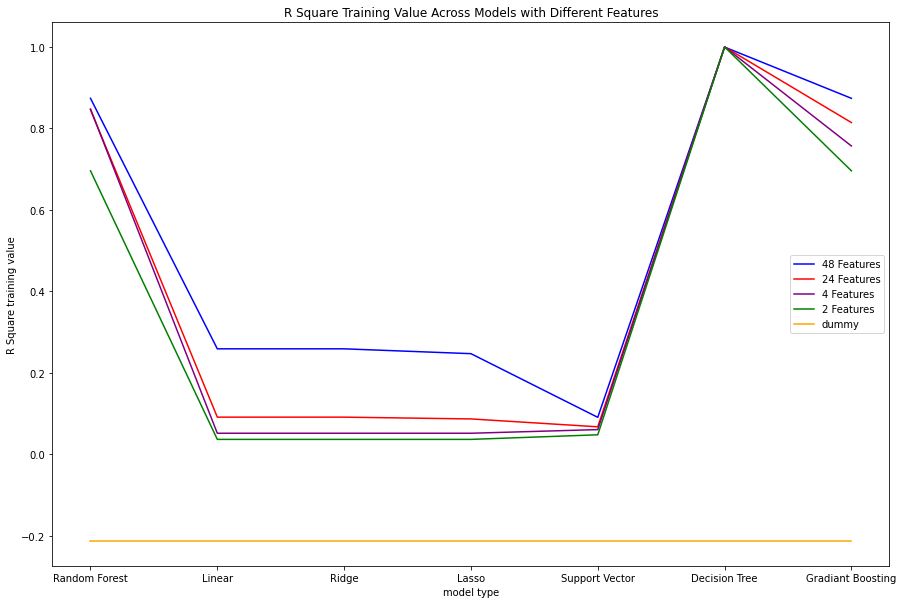

In [56]:
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(errors, R2tr_48, '-b', label='48 Features')
ax.plot(errors, R2tr_24, '-r', label='24 Features')
ax.plot(errors, R2tr_4, 'purple', label='4 Features')
ax.plot(errors, R2tr_2, '-g', label='2 Features')
ax.plot(errors, R2_traind, 'orange', label='dummy')
# naming the x axis 
plt.xlabel('model type') 
# naming the y axis 
plt.ylabel('R Square training value') 
# title
plt.title("R Square Training Value Across Models with Different Features") 
# show the legend 
leg = ax.legend();

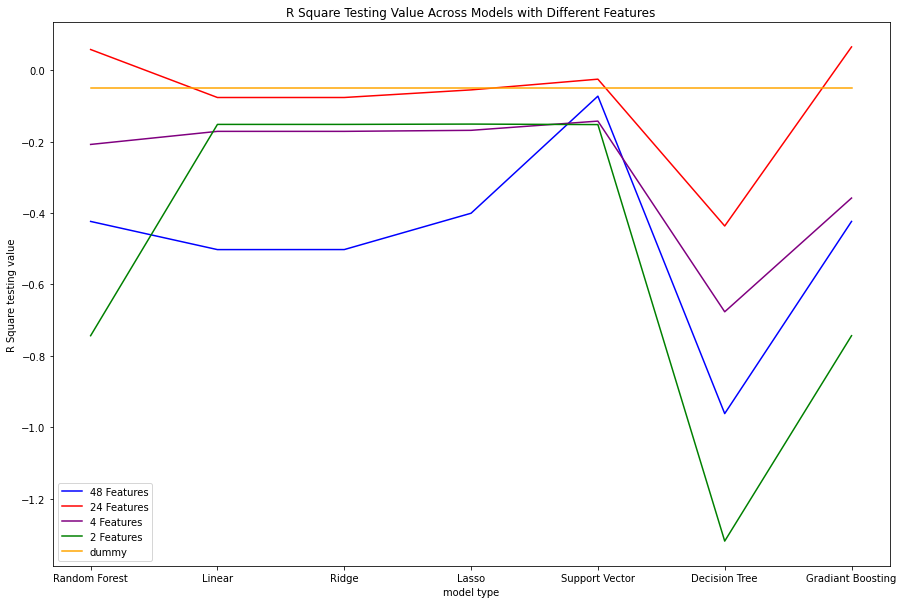

In [57]:
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(errors, R2te_48, '-b', label='48 Features')
ax.plot(errors, R2te_24, '-r', label='24 Features')
ax.plot(errors, R2te_4, 'purple', label='4 Features')
ax.plot(errors, R2te_2, '-g', label='2 Features')
ax.plot(errors, R2_testd, 'orange', label='dummy')
# naming the x axis 
plt.xlabel('model type') 
# naming the y axis 
plt.ylabel('R Square testing value') 
# title
plt.title("R Square Testing Value Across Models with Different Features") 
# show the legend 
leg = ax.legend();

#Scatter plot

In [58]:
feat["total_off"] = feat["off_1"] + feat["off_2"]

In [59]:
feat["total_def"] = feat["def_1"] + feat["def_2"]

In [60]:
feat["diff"] = feat["total_off"] - feat["total_def"] 

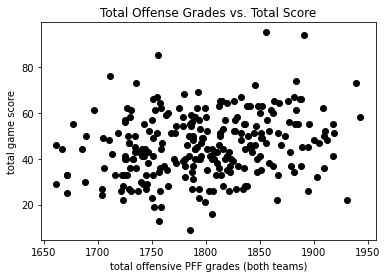

In [61]:
plt.plot(feat["total_off"], data["Total Score"], 'o', color='black');
plt.xlabel("total offensive PFF grades (both teams)")
plt.ylabel("total game score")
plt.title("Total Offense Grades vs. Total Score");

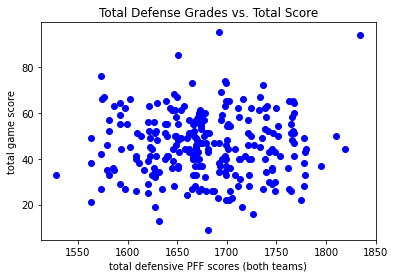

In [62]:
plt.plot(feat["total_def"], data["Total Score"], 'o', color='blue');
plt.xlabel("total defensive PFF scores (both teams)")
plt.ylabel("total game score")
plt.title("Total Defense Grades vs. Total Score");

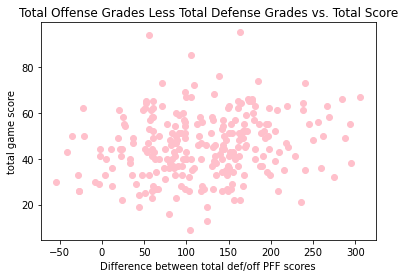

In [63]:
plt.plot(feat["diff"], data["Total Score"], 'o', color='pink');
plt.xlabel("Difference between total def/off PFF scores")
plt.ylabel("total game score")
plt.title("Total Offense Grades Less Total Defense Grades vs. Total Score");

In [64]:
feat["QB Total"] = feat["QB"] + feat["QB.1"]

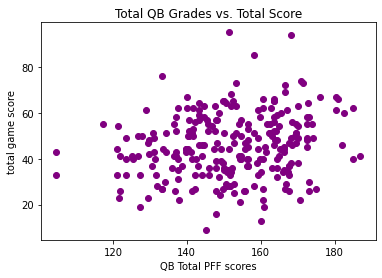

In [65]:
plt.plot(feat["QB Total"], data["Total Score"], 'o', color='purple');
plt.xlabel("QB Total PFF scores")
plt.ylabel("total game score")
plt.title("Total QB Grades vs. Total Score");

6# Attempt 3: high vs. low scoring target / 48 features

In [66]:
data['high_scoring'] = data['Total Score'].apply(lambda x: 1 if x > 45 else 0)

In [67]:
targ_b = data['high_scoring']

In [68]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ_b, test_size=0.2, random_state=302)

In [69]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [70]:
# -- assess the accuracy on the TRAINING data
pred_tr = clf.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = clf.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 1.000
testing accuracy = 0.673


In [71]:
# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 500]}]

In [72]:
# -- perform Grid Search
rtc_tune = RandomForestClassifier()
cv_tune = GridSearchCV(rtc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [73]:
# -- print out the params with the highest "score"
score = cv_tune.best_params_.get("min_samples_leaf")
score

1

In [74]:
# -- define classifier
mod = RandomForestClassifier(min_samples_leaf=score)

# -- fit a decision tree classifier on the TRAINING data
mod.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 1.000
testing accuracy = 0.462


#Attempt 6: high vs. low scoring target / 24 features

In [75]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_a, targ_b, test_size=0.2, random_state=302)

In [76]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [77]:
# -- assess the accuracy on the TRAINING data
pred_tr = clf.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = clf.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 1.000
testing accuracy = 0.481


In [78]:
# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 500]}]

In [79]:
# -- perform Grid Search
rtc_tune = RandomForestClassifier()
cv_tune = GridSearchCV(rtc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [80]:
# -- print out the params with the highest "score"
score = cv_tune.best_params_.get("min_samples_leaf")
score

100

In [81]:
# -- define classifier
mod = RandomForestClassifier(min_samples_leaf=score)

# -- fit a decision tree classifier on the TRAINING data
mod.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.539
testing accuracy = 0.404


#Attempt 7: high vs. low scoring target / 4 features

In [82]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_b, targ_b, test_size=0.2, random_state=302)

In [83]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=7)
clf.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [84]:
# -- assess the accuracy on the TRAINING data
pred_tr = clf.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = clf.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.745
testing accuracy = 0.519


In [85]:
# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 500]}]

In [86]:
# -- perform Grid Search
rtc_tune = RandomForestClassifier()
cv_tune = GridSearchCV(rtc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [87]:
# -- print out the params with the highest "score"
score = cv_tune.best_params_.get("min_samples_leaf")
score

1

In [88]:
# -- define classifier
mod = RandomForestClassifier(min_samples_leaf=15, random_state=0)

# -- fit a decision tree classifier on the TRAINING data
mod.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.725
testing accuracy = 0.577


#Attempt 8: high vs. low scoring target / offense as feature

In [89]:
feat_c = np.asarray(feat["total_off"]).reshape(-1, 1)

In [90]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_c, targ_b, test_size=0.2, random_state=302)

In [91]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=10)
clf.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [92]:
# -- assess the accuracy on the TRAINING data
pred_tr = clf.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = clf.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.701
testing accuracy = 0.462


In [93]:
# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 500]}]

In [94]:
# -- perform Grid Search
rtc_tune = RandomForestClassifier()
cv_tune = GridSearchCV(rtc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [95]:
# -- print out the params with the highest "score"
score = cv_tune.best_params_.get("min_samples_leaf")
score

20

In [96]:
# -- define classifier
mod = RandomForestClassifier(min_samples_leaf=15, random_state=0)

# -- fit a decision tree classifier on the TRAINING data
mod.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.647
testing accuracy = 0.538


In [97]:
from urllib.request import urlopen

In [98]:
url = "http://www.nflweather.com/en/week/2019/week-16/"

In [99]:
page = urlopen(url)
html_bytes = page.read()
html = html_bytes.decode("utf-8")
print(html)

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>NFLWeather.com</title>

    <meta http-equiv="content-type" content="text/xhtml; charset=utf-8" />
    <meta http-equiv="imagetoolbar" content="no" />
    <meta name="distribution" content="all" />
    <meta name="robots" content="all" />
    <meta name="resource-type" content="document" />
    <meta name="MSSmartTagsPreventParsing" content="true" />
    <meta name="verify-v1" content="xyXjzoRCYtgpIeSDu6dgGxwV48o6Ml0H6+577uOEyjA=" />
    <meta name="copyright" content="NFLWeather.com" />
    <meta name="author" content="NFLWeather.com" />
    <meta name="description" content="Every weather report, on the hour, for every NFL football game every week." />
    <meta name="keywords" content="NFL, Weather, Fantasy Football, NFL Weather, Weather Forecast, Forecast, NFL Stadium Conditions" />
    <meta content="authenticity_token" name="csr

#Attempt 9: Weather

In [100]:
# -- set the filename
# Uncomment if running from Google Collaboratory
fname = "weather_20131231 (1).csv"
#fname = "/content/drive/MyDrive/math637_MaryManz/weather_20131231.csv"

# -- read the csv into a DataFrame
data = pd.read_csv(fname)

In [101]:
data=data.replace('%','',regex=True)

In [102]:
data.head(2)

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78,8.0,66 degrees- relative humidity 78- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80,16.0,72 degrees- relative humidity 80- wind 16 mph,9/24/1960


In [103]:
data["humidity"] = data["humidity"].dropna()
data["wind_mph"] = data["wind_mph"].dropna()
data["temperature"] = data["temperature"].dropna()

In [104]:
feat = data[["temperature", "humidity", "wind_mph"]]
data['total_score'] = data["home_score"] + data["away_score"]
targ = data['total_score']

In [105]:
nona = data['humidity'].notna() & data['wind_mph'].notna()

In [106]:
feat = feat[nona]
targ = targ[nona]

In [107]:
feat = feat.astype(int)

In [108]:
targ.median()

40.0

In [109]:
data['high_scoring'] = data['total_score'].apply(lambda x: 1 if x > 40 else 0)

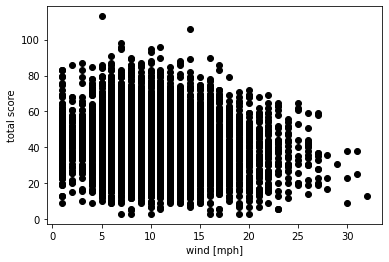

In [110]:
plt.plot(feat["wind_mph"], targ, 'o', color='black');
plt.xlabel("wind [mph]")
plt.ylabel("total score");

In [111]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

In [112]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [113]:
# -- assess the accuracy on the TRAINING data
pred_tr = clf.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = clf.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.908
testing accuracy = 0.028


In [114]:
# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 500]}]

In [115]:
# -- perform Grid Search
rtc_tune = RandomForestClassifier()
cv_tune = GridSearchCV(rtc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [116]:
# -- print out the params with the highest "score"
score = cv_tune.best_params_.get("min_samples_leaf")
score

500

In [117]:
# -- define classifier
mod = RandomForestClassifier(min_samples_leaf=score)

# -- fit a decision tree classifier on the TRAINING data
mod.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.048
testing accuracy = 0.045


#Attempt 10: last season scores and QB PFF

In [118]:
# -- set the filename
# Uncomment if running from Google Collaboratory
fname = "2020 scores.csv"
# fname = "/content/drive/MyDrive/math637_MaryManz/2020 scores.csv"

# -- read the csv into a DataFrame
data = pd.read_csv(fname)

In [119]:
data['high_scoring'] = data['Total Score'].apply(lambda x: 1 if x > 49 else 0)

In [120]:
# -- clean data
data=data.replace('\*','',regex=True)
data=data.replace('\(','',regex=True)
data=data.replace('\)','',regex=True)

In [121]:
data.iloc[:, 12:] = data.iloc[:, 12:].astype(float).abs()

In [122]:
# -- clean data
data["Visitor QB 2019 PFF Score"]=data["Visitor QB 2019 PFF Score"].replace('\*','',regex=True)
data["Visitor QB 2019 PFF Score"]=data["Visitor QB 2019 PFF Score"].replace('\(','',regex=True)
data["Visitor QB 2019 PFF Score"]=data["Visitor QB 2019 PFF Score"].replace('\)','',regex=True).astype(float).abs()

data["Home QB 2019 PFF Score"]=data["Home QB 2019 PFF Score"].replace('\*','',regex=True)
data["Home QB 2019 PFF Score"]=data["Home QB 2019 PFF Score"].replace('\(','',regex=True)
data["Home QB 2019 PFF Score"]=data["Home QB 2019 PFF Score"].replace('\)','',regex=True).astype(float).abs()

In [123]:
# add columns
data["off_1"] = data.iloc[:, 12:24].sum(axis=1)
data["def_1"] = data.iloc[:, 24:36].sum(axis=1)
data["off_2"] = data.iloc[:, 36:48].sum(axis=1)
data["def_2"] = data.iloc[:, 48:60].sum(axis=1)

data["vistotpff"] = data.iloc[:, 12:36].sum(axis=1)
data["homtotpff"] = data.iloc[:, 36:60].sum(axis=1)
data["vistotalpff_dif"] = data["vistotpff"] - data["homtotpff"] 

data["visage_diff"] = data["Vistor Avg Age"] - data["Home Avg Age"]

data["visoff_diff"] = data["off_1"] - data["off_2"]
data["visdef_diff"] = data["def_1"] - data["def_2"]

data["QBPFF_VisLessHom"] = data["Visitor QB 2019 PFF Score"] - data["Home QB 2019 PFF Score"]

data["AvgScore_VisLessHom"] = data["Visitor Avg 2019 score"] - data["Home Avg 2019 score"]

data["QBVisAge_diff"] = data["QB Age Visitor"] - data["QB Age Home"]

In [124]:
data.head(2)

,Date,Visitor,Visitor Score,Home,Home Score,OT,Total Score,Visitor Wins?,Visitor Avg 2019 score,Home Avg 2019 score,Visitor QB 2019 PFF Score,Home QB 2019 PFF Score,Vistor Avg Age,Home Avg Age,QB Age Visitor,QB Age Home,QB,RB1,RB2,TE,WR1,WR2,WR3,LT,LG,C,RG,RT,DT1,DT2,DT3,Edge1,Edge2,LB1,LB2,CB1,CB2,CB3,SS,FS,QB.1,RB1.1,RB2.1,TE.1,WR1.1,WR2.1,WR3.1,LT .1,LG.1,C.1,RG.1,RT.1,DT1.1,DT2.1,DT3.1,Edge1.1,Edge2.1,LB1.1,LB2.1,CB1.1,CB2.1,CB3.1,SS.1,FS.1,high_scoring,off_1,def_1,off_2,def_2,vistotpff,homtotpff,vistotalpff_dif,visage_diff,visoff_diff,visdef_diff,QBPFF_VisLessHom,AvgScore_VisLessHom,QBVisAge_diff
0,9/10/2020,Houston Texans,20,Kansas City Chiefs,34,NaN,54,0,23.625,26.75,82.4,90.2,26.1,25.9,24.0,24.0,82.4,72.2,75.9,56.6,68.1,75.2,69.9,75.1,59.1,67.3,53.4,59.4,55.3,81.5,59.8,87.0,63.7,68.6,65.8,64.0,64.5,73.4,62.5,76.7,90.2,85.0,65.7,86.1,84.5,71.6,68.1,71.2,67.4,66.0,59.7,89.3,87.6,59.8,63.3,48.2,50.4,44.4,83.1,65.7,55.2,71.9,75.4,71.5,1.0,675.4,784.9,899.5,784.9,1460.3,1684.4,-224.1,0.2,-224.1,0.0,-7.8,-3.125,0.0
1,9/13/2020,Seattle Seahawks,38,Atlanta Falcons,25,NaN,63,1,25.000,21.00,92.0,75.8,26.2,26.9,31.0,34.0,92.0,77.9,79.6,66.9,81.9,73.4,65.6,74.1,60.3,56.9,79.3,63.6,68.4,61.8,56.3,62.9,76.4,59.9,90.5,78.0,87.6,72.4,62.8,73.4,75.8,67.0,58.9,73.1,90.6,74.9,66.3,79.7,87.7,72.1,66.6,53.0,90.1,67.5,81.0,72.0,67.0,76.6,62.6,76.6,56.8,47.5,72.0,58.7,1.0,729.5,814.3,882.5,872.8,1543.8,1755.3,-211.5,-0.7,-153.0,-58.5,16.2,4.000,-3.0


In [125]:
feat = data[["Visitor Avg 2019 score", "Home Avg 2019 score", "QBPFF_VisLessHom", "AvgScore_VisLessHom", "QB Age Visitor"]]
#feat = data[["Visitor Avg 2019 score", "Home Avg 2019 score", "QBPFF_VisLessHom", "AvgScore_VisLessHom", "visage_diff"]] #better than using total team PFF difference
#feat = data[["Visitor Avg 2019 score", "Home Avg 2019 score", "vistotalpff_dif", "AvgScore_VisLessHom"]]
#feat = data[["AvgScore_VisLessHom", "QBPFF_VisLessHom"]]
#feat = data[["Visitor Avg 2019 score", "Home Avg 2019 score", "vistotalpff_dif", "visoff_diff", "visdef_diff"]]
#feat = data[["Visitor Avg 2019 score", "Home Avg 2019 score", "vistotalpff_dif"]]
#feat = data["vistotalpff_dif"]
targ = data["Visitor Wins?"]
targ_b = data["high_scoring"]

In [126]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)
#feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ_b, test_size=0.2, random_state=302)

In [127]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=1)
clf.fit(feat_tr, targ_tr)
# -- assess the accuracy on the TRAINING data
pred_tr = clf.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))
# -- assess the accuracy on the TESTING data
pred_te = clf.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 1.000
testing accuracy = 0.673


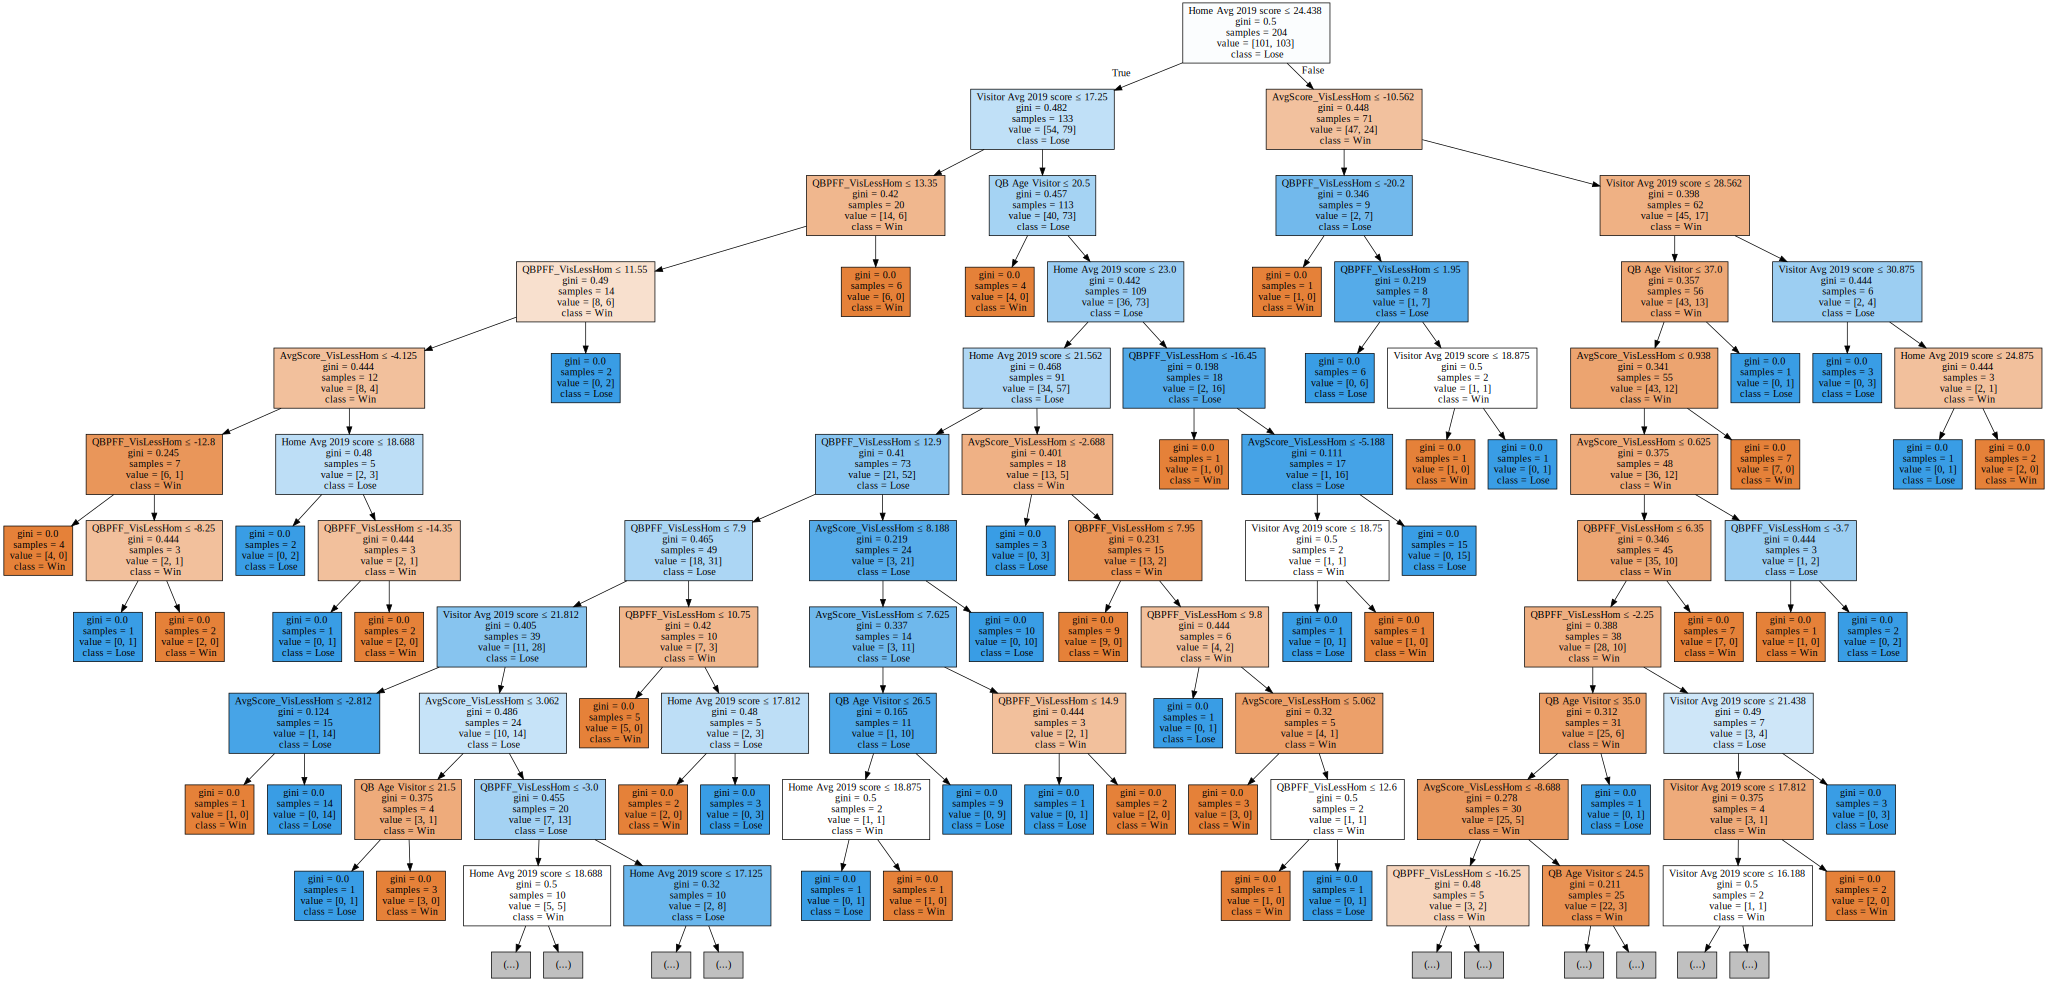

In [128]:
# -- visualize the tree
dt_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=False,  
                      special_characters=True, max_depth=10, feature_names=feat.columns, class_names=["Win", "Lose"])  
graph = graphviz.Source(dt_data)
graph

In [129]:
# -- define classifier
mod = RandomForestClassifier(random_state=0)
# -- fit a decision tree classifier on the TRAINING data
mod.fit(feat_tr, targ_tr)
# -- assess the accuracy on the TRAINING data
pred_tr = mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))
# -- assess the accuracy on the TESTING data
pred_te = mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 1.000
testing accuracy = 0.692


In [130]:
gbc = GradientBoostingClassifier(random_state=0, min_samples_split=11)
gbc.fit(feat_tr, targ_tr)
pred_tr = gbc.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))
pred_te = gbc.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.966
testing accuracy = 0.827


In [131]:
KN = KNeighborsClassifier()
KN.fit(feat_tr, targ_tr)
pred_tr = KN.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))
pred_te = KN.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 0.745
testing accuracy = 0.635


In [132]:
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(feat_tr, targ_tr)
pred_tr = gpc.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))
pred_te = gpc.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

training accuracy = 1.000
testing accuracy = 0.635
